In [1]:
%matplotlib inline

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='ticks')

plt.rcParams['text.usetex']=True
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25 


In [2]:
#Zeta-hat function for computing debiased values
z0 = 0.3 # we're correcting to redshift 0.3

def fhat_mel(f,z,z0,zeta_hat):
    
    val = 1. - (1. - f)*np.exp(-(z - z0)/ zeta_hat)
    
    return val

#assume zeta_hat is a linear function of surface brightness
def zeta_hat_lin(SB,slope,intercept):
    
    val = 10.**((SB*slope) + intercept)
    return val

def plot_fhat(z,slope,intercept,SB):
    plt.plot(x,fhat_mel(x,z,z0,zeta_hat_lin(SB,slope,intercept)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
x=np.linspace(0,1,10)    

# 1st draft (submitted) version
## Linear zeta fit, slope = -0.027 , intercept = 0.5
## First-order approximation, constant = 0.9

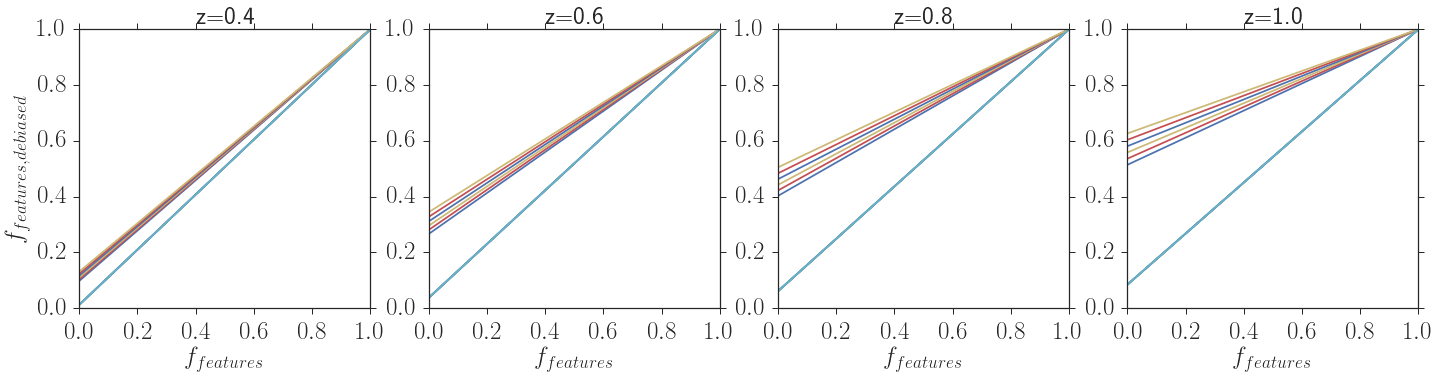

In [53]:
zs=[0.4,0.6,0.8,1.0]
f=plt.figure(figsize=(24,5))
gs = gridspec.GridSpec(1,4)
for i in range(0,len(zs)):
    ax=plt.subplot(gs[0,i])
    for s in range(19,25):
        plot_fhat(zs[i],-.027,.5,s)
        plot_fhat(zs[i],0,.9,s)
    plt.title('z=%s'%zs[i],fontsize=25)
    plt.xlabel('$f_{features}$',fontsize=25)
    if i==0:
        plt.ylabel('$f_{features,debiased}$',fontsize=25)

## Above: the surface brightness does not strongly affect the change in f_features. Even at z=1, the change is small because at z=1, f_features < 0.8 are not considered correctable. It is clear, however that if the SB dependence is taken out, the constant zeta needs to be chosen carefully - the first order approximation calculated in Step 2: Zeta clearly produces very different results. 

# Compare linear vs constant from method with new normalization applied in Step 2: Zeta

Slope - -0.0099, intercept - 0.0766
Constant estimate: 0.8

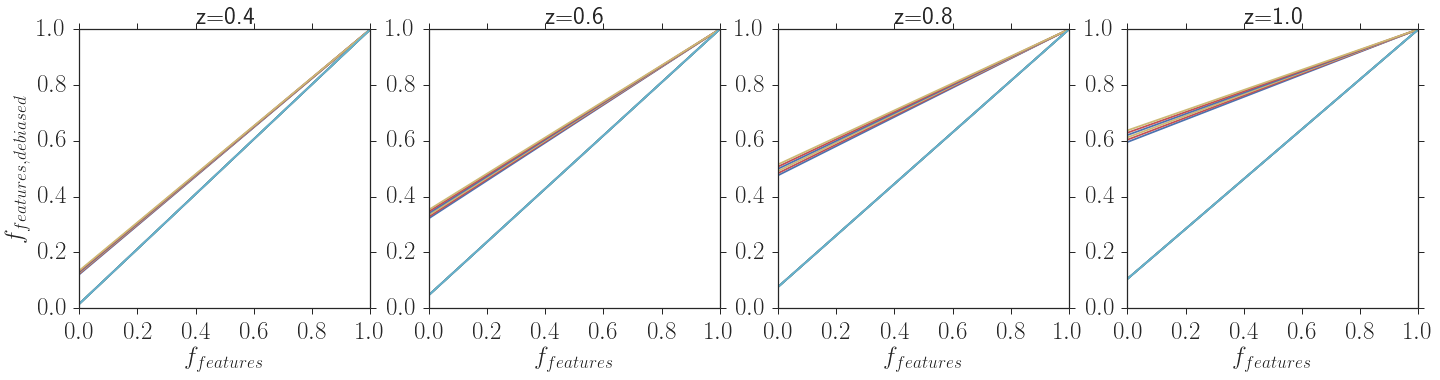

In [54]:
zs=[0.4,0.6,0.8,1.0]
f=plt.figure(figsize=(24,5))
gs = gridspec.GridSpec(1,4)
for i in range(0,len(zs)):
    ax=plt.subplot(gs[0,i])
    for s in range(19,25):
        plot_fhat(zs[i],-.0099,.0766,s)
        plot_fhat(zs[i],0,.8,s)
    plt.title('z=%s'%zs[i],fontsize=25)
    plt.xlabel('$f_{features}$',fontsize=25)
    if i==0:
        plt.ylabel('$f_{features,debiased}$',fontsize=25)

## Compare linear vs constant from method with new normalization applied in zeta_models2

Slope: 0.0268 Intercept: -0.48990846

Constant: 13.182

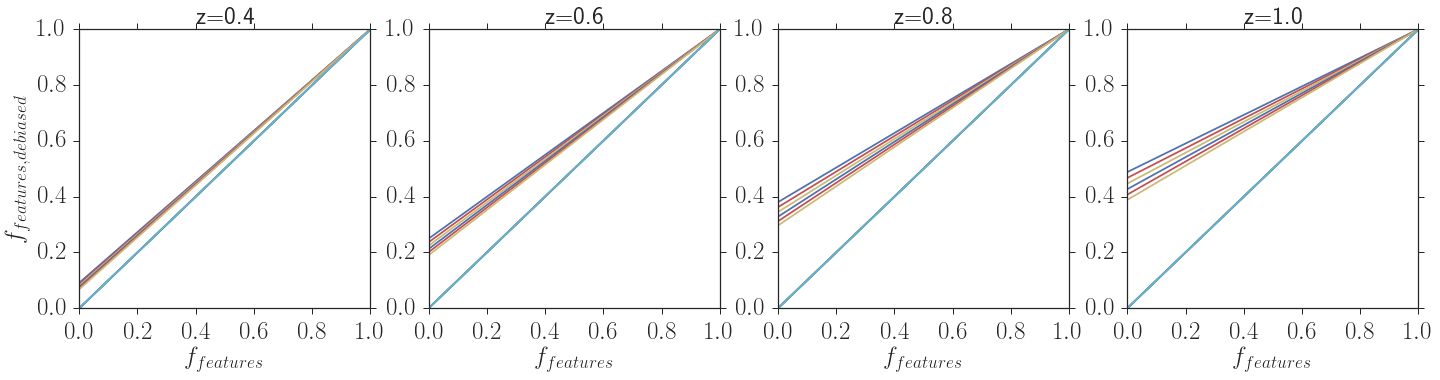

In [56]:
zs=[0.4,0.6,0.8,1.0]
f=plt.figure(figsize=(24,5))
gs = gridspec.GridSpec(1,4)
for i in range(0,len(zs)):
    ax=plt.subplot(gs[0,i])
    for s in range(19,25):
        plot_fhat(zs[i],.0268,-.4899,s)
        plot_fhat(zs[i],0,13.2,s)
    plt.title('z=%s'%zs[i],fontsize=25)
    plt.xlabel('$f_{features}$',fontsize=25)
    if i==0:
        plt.ylabel('$f_{features,debiased}$',fontsize=25)

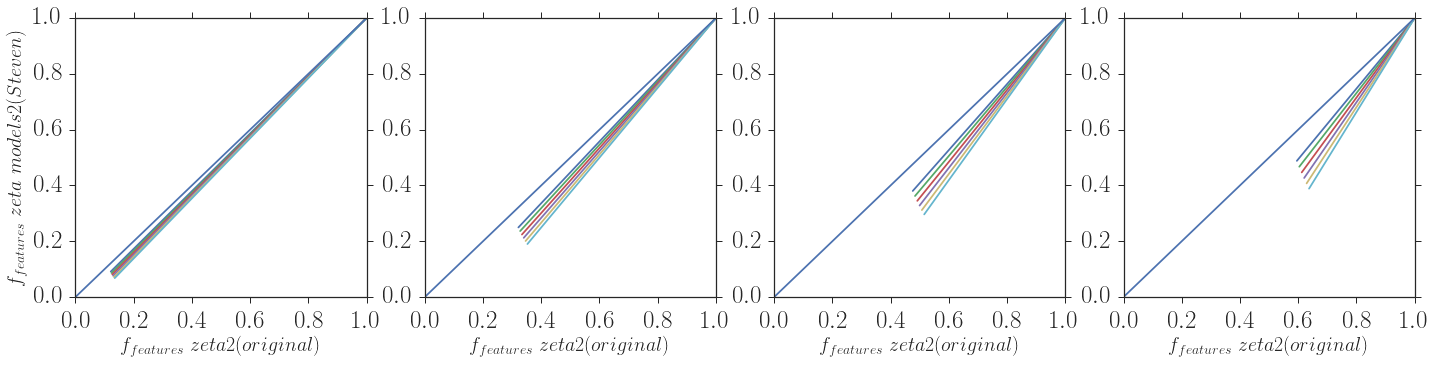

In [65]:
f=plt.figure(figsize=(24,5))
gs = gridspec.GridSpec(1,4)
for i in range(0,len(zs)):
    ax=plt.subplot(gs[0,i])

    for s in range(19,25):
        plt.plot(fhat_mel(x,zs[i],z0,zeta_hat_lin(s,-.0099,.0766)),fhat_mel(x,zs[i],z0,zeta_hat_lin(s,.0268,-.4899)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(x,x)
    
    plt.xlabel('$f_{features}~zeta2(original)$',fontsize=20)
    if i==0:
        plt.ylabel('$f_{features}~zeta~models2(Steven)$',fontsize=20)

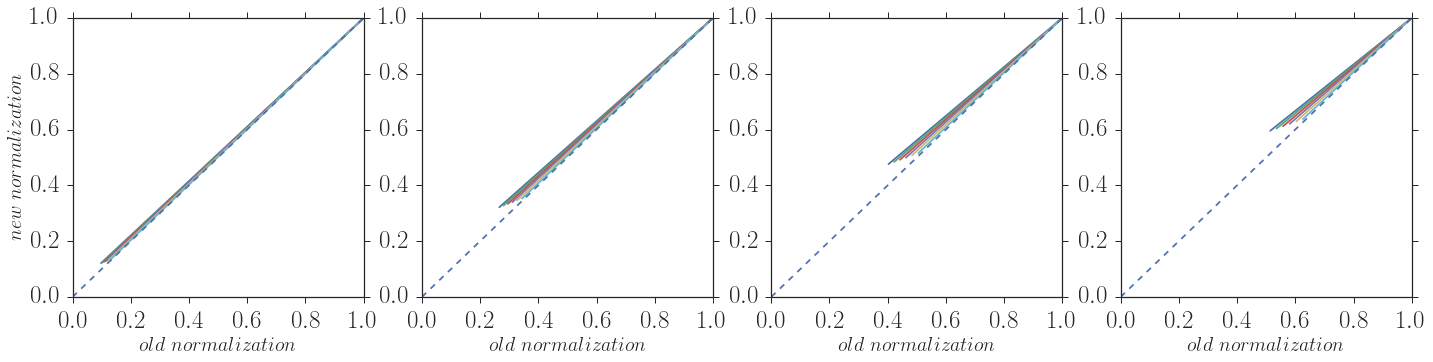

In [5]:
zs=[0.4,0.6,0.8,1.0]

f=plt.figure(figsize=(24,5))
gs = gridspec.GridSpec(1,4)
for i in range(0,len(zs)):
    ax=plt.subplot(gs[0,i])

    for s in range(19,25):
        plt.plot(fhat_mel(x,zs[i],z0,zeta_hat_lin(s,-.027,.5)),fhat_mel(x,zs[i],z0,zeta_hat_lin(s,-.0099,.0766)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(x,x,ls='dashed')
    
    plt.xlabel('$old~normalization$',fontsize=20)
    if i==0:
        plt.ylabel('$new~normalization$',fontsize=20)

In [3]:
hubble_fname = '/home/mel/Dropbox/gzhubble/hubble_files/catalog_debiasing_files/new_sb_method/input_for_hubble_debiased_catalog.fits'
votes_data=Table.read(hubble_fname)



In [4]:
correctable=(votes_data['correction_type']==0)
uncorrectable=(votes_data['correction_type']==1)
nei=(votes_data['correction_type']==3)
old_votes=votes_data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
z = votes_data['Z_BEST']
SB = votes_data['GZ_MU_I']


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


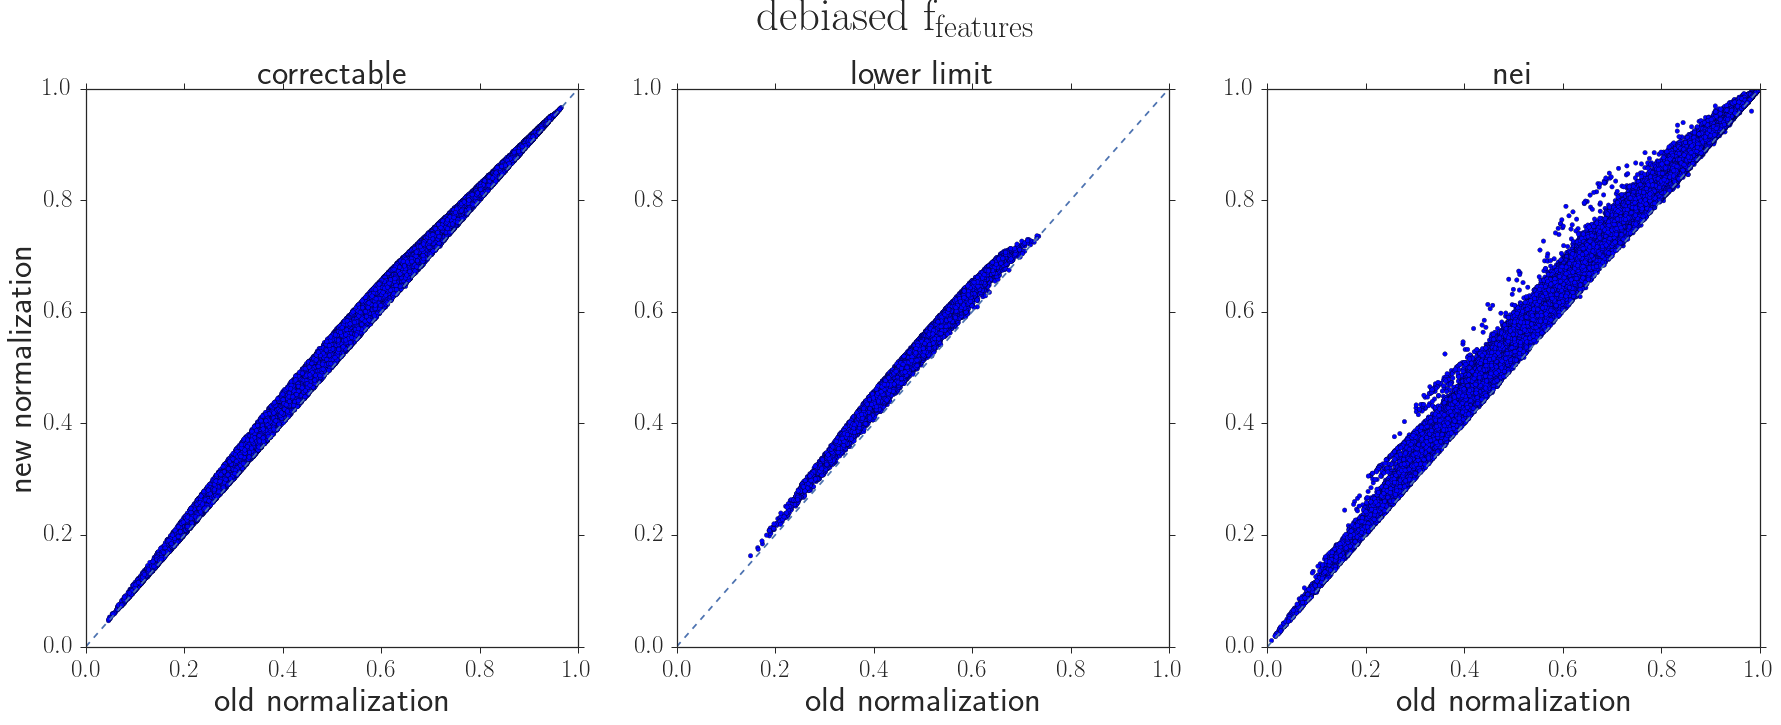

In [5]:
f=plt.figure(figsize=(30,10))
gs = gridspec.GridSpec(1,3)
ax=plt.subplot(gs[0,0])
plt.scatter(fhat_mel(old_votes[correctable],z[correctable],z0,zeta_hat_lin(SB[correctable],-.027,.5)),fhat_mel(old_votes[correctable],z[correctable],z0,zeta_hat_lin(SB[correctable],-.0099,.0766)))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x,x,ls='dashed')
plt.xlabel('old normalization',fontsize=35)
plt.ylabel('new normalization',fontsize=35)
plt.title('correctable',fontsize=35)

ax=plt.subplot(gs[0,1])
plt.scatter(fhat_mel(old_votes[uncorrectable],z[uncorrectable],z0,zeta_hat_lin(SB[uncorrectable],-.027,.5)),fhat_mel(old_votes[uncorrectable],z[uncorrectable],z0,zeta_hat_lin(SB[uncorrectable],-.0099,.0766)))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x,x,ls='dashed')
plt.xlabel('old normalization',fontsize=35)
plt.title('lower limit',fontsize=35)


ax=plt.subplot(gs[0,2])
plt.scatter(fhat_mel(old_votes[nei],z[nei],z0,zeta_hat_lin(SB[nei],-.027,.5)),fhat_mel(old_votes[nei],z[nei],z0,zeta_hat_lin(SB[nei],-.0099,.0766)))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x,x,ls='dashed')
plt.xlabel('old normalization',fontsize=35)
plt.title('nei',fontsize=35)

f.text(.5,.97,'$\mathrm{debiased~f_{features}}$',fontsize=45,horizontalalignment = 'center')

In [25]:
old_norm_c = fhat_mel(old_votes[correctable],z[correctable],z0,zeta_hat_lin(SB[correctable],-.027,.5))
new_norm_c = fhat_mel(old_votes[correctable],z[correctable],z0,zeta_hat_lin(SB[correctable],-.0099,.0766))
old_norm_l = fhat_mel(old_votes[uncorrectable],z[uncorrectable],z0,zeta_hat_lin(SB[uncorrectable],-.027,.5))
new_norm_l = fhat_mel(old_votes[uncorrectable],z[uncorrectable],z0,zeta_hat_lin(SB[uncorrectable],-.0099,.0766))
old_norm_n = fhat_mel(old_votes[nei],z[nei],z0,zeta_hat_lin(SB[nei],-.027,.5))
new_norm_n = fhat_mel(old_votes[nei],z[nei],z0,zeta_hat_lin(SB[nei],-.0099,.0766))

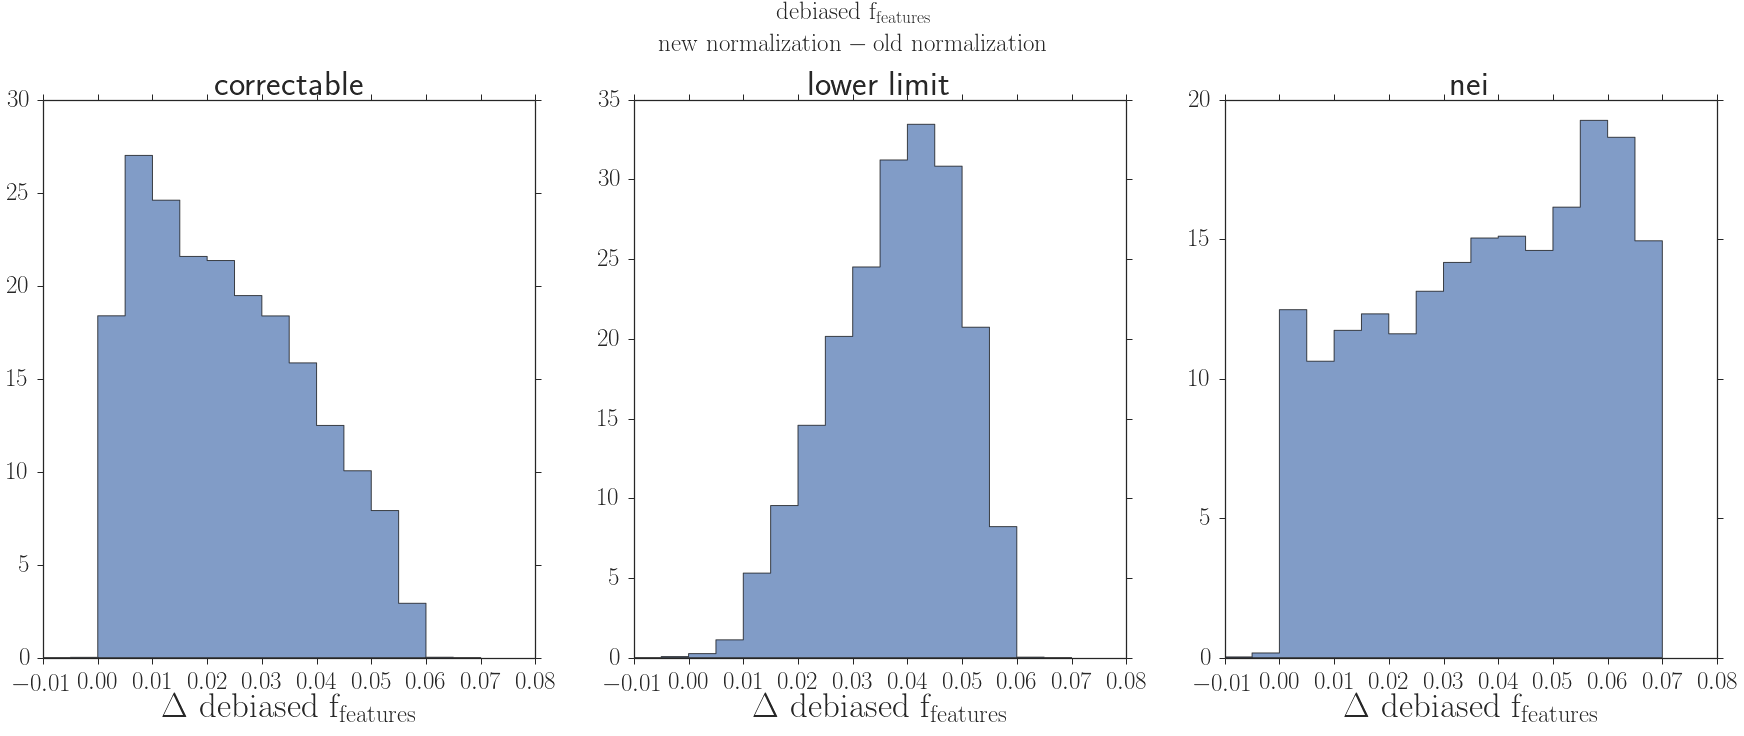

In [28]:
f=plt.figure(figsize=(30,10))
gs = gridspec.GridSpec(1,3)
ax=plt.subplot(gs[0,0])
plt.hist(new_norm_c-old_norm_c,histtype='stepfilled',alpha=.7,lw=1,range=(-.01,.07),bins=16,normed=True)
plt.title('correctable',fontsize=35)
plt.xlabel('$\mathrm{\Delta~debiased~f_{features}}$',fontsize=35)

ax=plt.subplot(gs[0,1])
plt.hist(new_norm_l-old_norm_l,histtype='stepfilled',alpha=.7,lw=1,range=(-.01,.07),bins=16,normed=True)
plt.title('lower limit',fontsize=35)
plt.xlabel('$\mathrm{\Delta~debiased~f_{features}}$',fontsize=35)


ax=plt.subplot(gs[0,2])
plt.hist(new_norm_n-old_norm_n,histtype='stepfilled',alpha=.7,lw=1,range=(-.01,.07),bins=16,normed=True)
plt.title('nei',fontsize=35)
plt.xlabel('$\mathrm{\Delta~debiased~f_{features}}$',fontsize=35)

f.text(.5,.97,'$\mathrm{debiased~f_{features}}$\n$\mathrm{new~normalization - old~normalization}$',fontsize=25,horizontalalignment = 'center')